# sklearn 分类
 
(kNN, 朴素贝叶斯, svn, 核技巧)

* matplotlib.colors.ListedColormap() 创建离散颜色映射的函数。函数接受一个颜色列表作为输入，并生成一个
离散的颜色映射对象，用于在可视化中区分不同的类别或数据值
* sklearn.datasets.load_iris() 加载鸢尾花数据
* sklearn.naive_bayes.GaussianNB() 实现高斯朴素贝叶斯分类器算法
* sklearn.neighbors.KNeighborsClassifier() 实现k 最近邻分类器算法
* sklearn.svm.SVC() 实现支持向量机分类器算法

## 分类

分类是监督学习中的一类问题.分类根据给定的数据集,通过对训练集的学习,建立分类模型来对新的数据进行分类的过程.

**决策边界** (decision boundary) 是分类模型在特征空间中划分不同类别的分界线或边界。通俗地说，决策边界就像是一道看不见的墙，把不同类别的数据点分隔开.

为了获得不同算法的决策边界，我们一般会用numpy.meshgrid() 生成一系列均匀网格数据，然后再分别预测每个网格点的分类，以此划定决策边界。(这就是可视化的魅力吧,把边界这种东西表达出来,让人一目了然)

模型训练过程就是调整模型的参数，使得决策边界能够最好地拟合训练数据，并且在未见过的数据上也能表现良好。

## k 最近邻分类

kNN 思路很简单——“近朱者赤，近墨者黑”。更准确地说，小范围投票，少数服从多数 (majority rule)

最近邻数量 k 直接影响查询点的分类结果;因此,选择合适的 k 值十分重要.

k-NN 算法选取较小的k 值虽然能准确捕捉训练数据的分类模式；但是，缺点也很明显，容易受到噪声影响。

rgb:
 [[1.         0.93333333 1.        ]
 [0.85882353 0.93333333 0.95686275]
 [0.89411765 0.89411765 0.89411765]]


/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

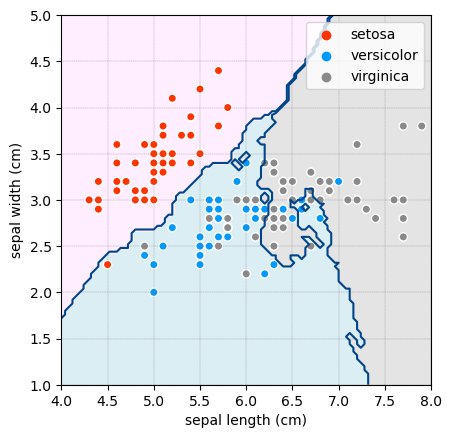

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets

# 导入数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target # 也可以通过iris['target']获得!!
# 生成网格化数据
x1_array = np.linspace(4, 8, 101)
x2_array = np.linspace(1, 5, 101)
xx1, xx2 = np.meshgrid(x1_array, x2_array)  # 网格化数据
# 创建色谱
rgb = [[255, 238, 255],
       [219, 238, 244],
       [228, 228, 228]]
rgb = np.array(rgb)/255.  # 归一化, 使得每个元素都在[0,1]之间
print("rgb:\n", rgb )
cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0],
             [0, 153, 255],
             [138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

k_neighbors = 8 # 定义 knn 的近邻数量 k
# 创建 kNN 分类器对象
knn = neighbors.KNeighborsClassifier(k_neighbors)
knn.fit(X , y) # 拟合模型
q = np.c_[xx1.ravel(), xx2.ravel()] # 将网格化数据转换为一维数组,再转换为二维数组作为预测输入
# 用 knn 对一系列点进行预测
y_predict = knn.predict(q)
y_predict = y_predict.reshape(xx1.shape) # 将预测结果转换为网格化数据的形状

# 可视化
fig , ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict, cmap = cmap_light)
plt.contour(xx1, xx2, y_predict, levels = [0,1,2],
            colors = np.array([0,68,138])/255.)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = iris.target_names[y],
                ax = ax,
                palette = dict(setosa=cmap_bold[0,:],
                               versicolor=cmap_bold[1,:],
                               virginica=cmap_bold[2,:]),
                alpha = 1.0,
                linewidth = 1,
                edgecolor = [1,1,1])
plt.xlim(4, 8 )
plt.ylim(1, 5 )
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle = '--', linewidth = 0.25,
        color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')


## 高斯朴素贝叶斯分类

贝叶斯定理、贝叶斯分类、贝叶斯推断中有两个重要概念——**先验概率** (prior probability)、**后验概率** (posterior probability)。

它基于以前的经验、先前的观察或领域知识。这种概率是“先验”的，因为它不考虑新数据或新证据，只是基于我们事先已经了解的信息。先验概率可以帮助我们在没有新数据时做出初步的估计。
> 假设我们要研究某地区的流感发病率。在流感季节之前，我们可能会查阅历史数据、了解流感传播的模式以及人口的健康状况，从而得出在流感季节中某人患上流感的初始估计概率，这就是先验概率。

后验概率是指在考虑了新证据或数据后，我们对一个事件或假设的概率进行更新后的估计。在得到新的信息后，我们根据贝叶斯定理来更新先验概率，以得到后验概率。贝叶斯定理将先验概率和新的证据结合起来，提供了一个更准确的概率估计.
> 在流感季节中，我们开始收集实际发病数据，比如每天有多少人确诊患上流感。根据这些新数据，我们可以**使用贝叶斯定理来更新**先前的先验概率，得到一个更准确的后验概率，以更好地预测未来发病率或做出相关决策。

在训练时，算法从训练数据中学习每个类别的各个特征的(条件) 均值和方差，用于计算每个特征在该类别下的概率密度函数。
> 先验概率,考虑的是各个特征的均值和方差

当有新的未标记样本输入时，算法将计算该样本在每个类别下的条件概率(后验概率)，并选择具有最高概率的类别作为预测结果。
> 后验概率,对新输入样本,则计算它们的各类别下条件概率

高斯朴素贝叶斯分类算法的优点是简单快速、易于实现和适用于高维数据。它还**能够处理连续型数据**，因为它假设数据分布是高斯分布。

rgb:
 [[1.         0.93333333 1.        ]
 [0.85882353 0.93333333 0.95686275]
 [0.89411765 0.89411765 0.89411765]]


/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

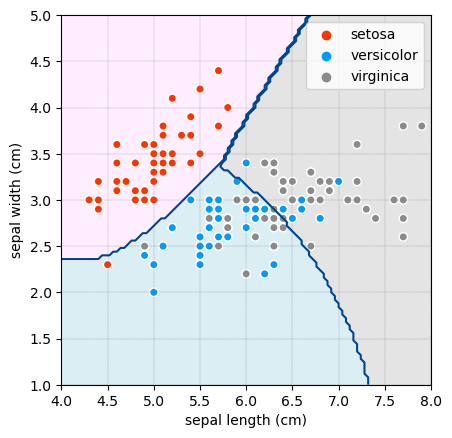

In [15]:
# 展示如何利用高斯朴素贝叶斯分类算法获得决策边界

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets

# 导入数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target # 也可以通过iris['target']获得!!
# 生成网格化数据
x1_array = np.linspace(4, 8, 101)
x2_array = np.linspace(1, 5, 101)
xx1, xx2 = np.meshgrid(x1_array, x2_array)  # 网格化数据
# 创建色谱
rgb = [[255, 238, 255],
       [219, 238, 244],
       [228, 228, 228]]
rgb = np.array(rgb)/255.  # 归一化, 使得每个元素都在[0,1]之间
print("rgb:\n", rgb )
cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0],
             [0, 153, 255],
             [138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

from sklearn.naive_bayes import GaussianNB
#创建高斯朴素贝叶斯分类器对象
gnb = GaussianNB()
# 使用训练数据训练 gnb
gnb.fit(X, y)
q = np.c_[xx1.ravel(), xx2.ravel()] # 将网格化数据转换为一维数组,再转换为二维数组作为预测输入
# 用 gnb 对一系列点进行预测
y_predict = gnb.predict(q)
y_predict = y_predict.reshape(xx1.shape) # 将预测结果转换为网格化数据的形状

# 可视化
fig , ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict, cmap = cmap_light)
plt.contour(xx1, xx2, y_predict, levels = [0,1,2],
            colors = np.array([0,68,138])/255.)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = iris.target_names[y],
                ax = ax,
                palette = dict(setosa=cmap_bold[0,:],
                               versicolor=cmap_bold[1,:],
                               virginica=cmap_bold[2,:]),
                alpha = 1.0,
                linewidth = 1,
                edgecolor = [1,1,1])
plt.xlim(4, 8 )
plt.ylim(1, 5 )
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle = '--', linewidth = 0.25,
        color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')

## 支持向量机

支持向量机 (support vector machine, SVM) 是一种**二分类模型**，它的基本模型是定义在特征空间上的间隔最大的线性分类器，间隔最大使它有别于感知机；支持向量机还包括核技巧，这使它成为实质上的非线性分类器。

支持向量机的思想可以这样理解:
假设我们有一些数据点，每个数据点都属于两个类别中的一个。我们的目标是找到一条直线，将这些数据点分成两组，使得两组数据点之间的距离最大化。在支持向量机中，我们将这条线称为**分隔超平面** (separating hyperplane)。
> 一片湖面左右散布着蓝色/红色礁石，游戏规则是，皮划艇以直线路径穿越水道，保证船身恰好紧贴礁石。寻找一条路径，让该路径通过的皮划艇宽度最大。
> 最佳路径的宽度是多少？这个问题可以转化为一个优化问题，即找到一条直线，使得该直线与最近的蓝色/红色点之间的距离最大化。这条直线就是**分隔超平面**。
> 最佳路径最近的蓝点/红点就是所谓的支持向量(support vector),因为它们决定了分隔超平面的位置。

在 svm 中,分离超平面就是我们前面一直讲到的**决策边界**,而支持向量就是离决策边界最近的那些点.

特别需要注意的是,支持向量决定决策边界位置;其他点对决策边界没有任何影响/作用.因此,svm 对于数据特征数量远高于样本数量的数据集仍然有效.

总而言之,svm 的优化目标为--间隔最大化.

### 线性不可分数据

从数据角度，书里两类数据用一条直线便可以分割开来，这种数据叫做线性可分 (linearly separable)。线性可分问题采用**硬间隔** (hard margin)；白话说，硬间隔指的是，间隔内没有数据点。

实际中,并不是所有的数据都是线性可分的.

对于线性不可分问题,就要引入两种方法:
1. 软间隔(soft margin)
2. 核技巧(kernel trick)

**软间隔** (soft margin)。软间隔允许数据点出现在间隔内，但是会受到惩罚。这样做的目的是为了找到一个更好的分类器，使得间隔更大，同时也减少间隔内的数据点。软间隔相当于一个缓冲区 (buffer zone)。软间隔存在时，用决策边界分离数
据时，有数据点侵入间隔，甚至超越间隔带。

rgb:
 [[1.         0.93333333 1.        ]
 [0.85882353 0.93333333 0.95686275]
 [0.89411765 0.89411765 0.89411765]]


/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

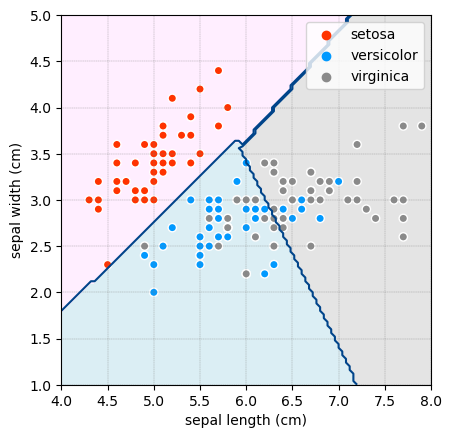

In [16]:
# 使用支持向量机(线性核)分类算法获得决策边界
# 线性核是 svm 中最简单的核函数,也是最常用的核函数之一.
# 它适用于处理线性可分的数据集,即可以通过一个直线(二维空间)/超平面(高维空间)将数据集划分为两个部分.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# 导入数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target # 也可以通过iris['target']获得!!
# 生成网格化数据
x1_array = np.linspace(4, 8, 101)
x2_array = np.linspace(1, 5, 101)
xx1, xx2 = np.meshgrid(x1_array, x2_array)  # 网格化数据
# 创建色谱
rgb = [[255, 238, 255],
       [219, 238, 244],
       [228, 228, 228]]
rgb = np.array(rgb)/255.  # 归一化, 使得每个元素都在[0,1]之间
print("rgb:\n", rgb )
cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0],
             [0, 153, 255],
             [138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

from sklearn import svm  ## svm 里有 SVC(代表分类), SVR(代表回归) 两类
#创建支持向量机分类器对象
svm_clf = svm.SVC(kernel='linear') # 线性核,在定义 svm_clf 时,可以通过 kernel 参数指定核函数为'linear'
# 使用训练数据训练 svm_clf
svm_clf.fit(X, y)
q = np.c_[xx1.ravel(), xx2.ravel()] # 将网格化数据转换为一维数组,再转换为二维数组作为预测输入
# 用 gnb 对一系列点进行预测
y_predict = svm_clf.predict(q)
y_predict = y_predict.reshape(xx1.shape) # 将预测结果转换为网格化数据的形状

# 可视化
fig , ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict, cmap = cmap_light)
plt.contour(xx1, xx2, y_predict, levels = [0,1,2],
            colors = np.array([0,68,138])/255.)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = iris.target_names[y],
                ax = ax,
                palette = dict(setosa=cmap_bold[0,:],
                               versicolor=cmap_bold[1,:],
                               virginica=cmap_bold[2,:]),
                alpha = 1.0,
                linewidth = 1,
                edgecolor = [1,1,1])
plt.xlim(4, 8 )
plt.ylim(1, 5 )
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle = '--', linewidth = 0.25,
        color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')

## 核技巧

核技巧能够将数据映射到高维特征空间,相当于数据升维.

例如对于一个平面上不可分的数据,我们利用核技巧,将二维数据投射到三维核曲面上; 此时,在这个高维特征空间,容易找到某个平面将数据分开.

通常,采用 svm 解决线性不可分问题,需要**并用软间隔和核技巧**.

**高斯核**，也称为径向基核 (Radial Basis Function Kernel)，是SVM 中常用的非线性核函数。它能够将数据映射到无穷维的特征空间，从而在低维空间中不可分的数据变得线性可分。


rgb:
 [[1.         0.93333333 1.        ]
 [0.85882353 0.93333333 0.95686275]
 [0.89411765 0.89411765 0.89411765]]


/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

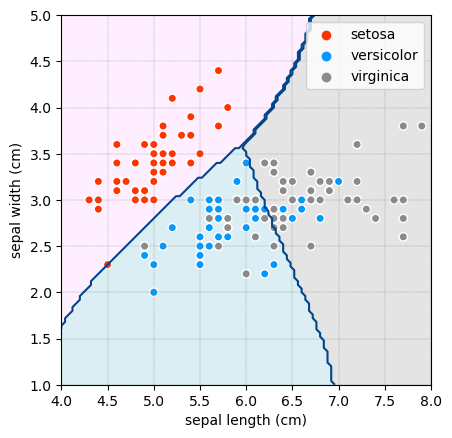

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# 导入数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target # 也可以通过iris['target']获得!!
# 生成网格化数据
x1_array = np.linspace(4, 8, 101)
x2_array = np.linspace(1, 5, 101)
xx1, xx2 = np.meshgrid(x1_array, x2_array)  # 网格化数据
# 创建色谱
rgb = [[255, 238, 255],
       [219, 238, 244],
       [228, 228, 228]]
rgb = np.array(rgb)/255.  # 归一化, 使得每个元素都在[0,1]之间
print("rgb:\n", rgb )
cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0],
             [0, 153, 255],
             [138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

from sklearn import svm  ## svm 里有 SVC(代表分类), SVR(代表回归) 两类
#创建支持向量机分类器对象
svm_clf = svm.SVC(kernel='rbf', gamma='auto') # 高斯核,在定义 svm_clf 时,可以通过 kernel 参数指定核函数为'rbf'
# 使用训练数据训练 svm_clf
svm_clf.fit(X, y)
q = np.c_[xx1.ravel(), xx2.ravel()] # 将网格化数据转换为一维数组,再转换为二维数组作为预测输入
# 用 gnb 对一系列点进行预测
y_predict = svm_clf.predict(q)
y_predict = y_predict.reshape(xx1.shape) # 将预测结果转换为网格化数据的形状

# 可视化
fig , ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict, cmap = cmap_light)
plt.contour(xx1, xx2, y_predict, levels = [0,1,2],
            colors = np.array([0,68,138])/255.)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = iris.target_names[y],
                ax = ax,
                palette = dict(setosa=cmap_bold[0,:],
                               versicolor=cmap_bold[1,:],
                               virginica=cmap_bold[2,:]),
                alpha = 1.0,
                linewidth = 1,
                edgecolor = [1,1,1])
plt.xlim(4, 8 )
plt.ylim(1, 5 )
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle = '--', linewidth = 0.25,
        color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')